In [230]:
import numpy as np
import matplotlib.pyplot as plt
from rouge import Rouge 
from os import listdir
from os.path import isfile, join

%matplotlib inline

In [57]:
# Test Rouge Score
hypothesis = "the #### transcript is a written version of each day 's cnn student news program use this transcript to he    lp students with reading comprehension and vocabulary use the weekly newsquiz to test your knowledge of storie s you     saw on cnn student news"
reference = "this page includes the show transcript use the transcript to help students with reading comprehension and     vocabulary at the bottom of the page , comment for a chance to be mentioned on cnn student news . you must be a teac    her or a student age # # or older to request a mention on the cnn student news roll call . the weekly newsquiz tests     students ' knowledge of even ts in the news"
rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)

In [70]:
#Score Format
print (scores)

[{'rouge-1': {'f': 0.49411764217577864, 'p': 0.5833333333333334, 'r': 0.42857142857142855}, 'rouge-2': {'f': 0.23423422957552154, 'p': 0.3170731707317073, 'r': 0.18571428571428572}, 'rouge-l': {'f': 0.42751590030718895, 'p': 0.5277777777777778, 'r': 0.3877551020408163}}]


In [105]:
class Sampler:
    def __init__(self, hypothesis, references, sources):
        self.hypothesis = hypothesis
        self.references = references
        self.sources = sources
        self.scores = self._compute_scores()
        
    def size(self):
        return len(self.sources)
    
    def _compute_scores(self):
        scores = []
        LEN = self.size()
        rouge = Rouge()
        
        for i in range(LEN):
            hyp = self.hypothesis[i].strip()
            ref = self.references[i].strip()
            score = rouge.get_scores(hyp, ref)
            rouge1_f = score[0]['rouge-1']['f']
            rouge2_f = score[0]['rouge-2']['f']
            rougeL_f = score[0]['rouge-l']['f']
            scores.append((i, rouge1_f, rouge2_f, rougeL_f))
        return scores
    
    def get_example(self, index=0, metric='rouge_L', reverse=False, log=True):
        if metric == "rouge_1":
            m = 1
        elif metric == "rouge_2":
            m = 2
        else:
            m = 3
            
        sorted_score = sorted(self.scores, key=lambda x: x[m], reverse=reverse)
        idx = sorted_score[index][0]
        
        if log:
            print ("Score: ", sorted_score[index][m])
            print("Reference:  ", self.references[idx].strip())
            print("Hypothesis: ", self.hypothesis[idx].strip())
            print ("\nAnswer: ")
            print (self.sources[idx])
            print ("=============\n")
        return {"score"  : sorted_score[index][m],
                "ref"    : self.references[idx].strip(),
                "hyp"    : self.hypothesis[idx].strip(),
                "answer" : self.sources[idx] }
    

### Attention Seq2Seq (Beam=1)

In [118]:
ref_file = open("../../data/clean/stackoverflow.com/test/targets.txt", "r")
hyp_as2s_b1_file = open("../../results/attention_seq2seq/pred_beam_01.txt", "r")
source_file = open("../../data/clean/stackoverflow.com/test/sources.txt", "r")

In [119]:
hyp_as2s_b1_lines = hyp_as2s_b1_file.readlines()
ref_lines = ref_file.readlines()
source_lines = source_file.readlines()

In [120]:
as2s_b1_sampler = Sampler(hyp_as2s_b1_lines, ref_lines, source_lines)

In [133]:
# The meaning is in the code
as2s_b1_sampler.get_example(index=0, reverse=False)

Score:  0.0
Reference:   wpf : create your own screen - saver if your running application is ' idle '
Hypothesis:  how to make a UNK mouse control ?

Answer: 
if your looking to create your own screensaver just create another form . remove the border from the form . make it the top most and start maximized . then you just paint the control to do whatever you want . then wire up the form to check if the mouse moves or a key is pressed . you 'll need to create a timer that will determine if the screensaver should be shown .




{'score': 0.0,
 'ref': "wpf : create your own screen - saver if your running application is ' idle '",
 'hyp': 'how to make a UNK mouse control ?',
 'answer': "if your looking to create your own screensaver just create another form . remove the border from the form . make it the top most and start maximized . then you just paint the control to do whatever you want . then wire up the form to check if the mouse moves or a key is pressed . you 'll need to create a timer that will determine if the screensaver should be shown .\n"}

In [122]:
# The keys are in the question and "tags"
as2s_b1_sampler.get_example(index=1000, reverse=False)

Score:  0.0
Reference:   unique permutations with no mirrored or circular repetitions
Hypothesis:  how to create a UNK UNK ?

Answer: 
i think you want to generate 2-ary free necklaces . see this question for link , papers , and some code .




{'score': 0.0,
 'ref': 'unique permutations with no mirrored or circular repetitions',
 'hyp': 'how to create a UNK UNK ?',
 'answer': 'i think you want to generate 2-ary free necklaces . see this question for link , papers , and some code .\n'}

In [123]:
"This is generic but clever"
as2s_b1_sampler.get_example(index=2000, reverse=False)

Score:  0.0
Reference:   birt scripted data source : undefined variable
Hypothesis:  why does this not work ?

Answer: 
a quick and dirty fix would be removing in open the var keyword from variables that you want to be seen in global scope . currently they are bound to the scope of a function - - and are thus not visible for a different function , . here is a code snippet to play with : see it on jsbin as noted , this is a dirty fix . you can declare a variable without using the var keyword and assign a value to it . this is known as an implicit declaration , and it is not recommended . an implicit declaration gives the variable global scope . when you declare a variable at the procedure level , though , you typically do not want it to have global scope . to avoid giving the variable global scope , you must use the var keyword in your variable declaration . source : https://docs.microsoft.com/en-us/scripting/javascript/reference/var-statement-javascript the lack of introductory documen

{'score': 0.0,
 'ref': 'birt scripted data source : undefined variable',
 'hyp': 'why does this not work ?',
 'answer': 'a quick and dirty fix would be removing in open the var keyword from variables that you want to be seen in global scope . currently they are bound to the scope of a function - - and are thus not visible for a different function , . here is a code snippet to play with : see it on jsbin as noted , this is a dirty fix . you can declare a variable without using the var keyword and assign a value to it . this is known as an implicit declaration , and it is not recommended . an implicit declaration gives the variable global scope . when you declare a variable at the procedure level , though , you typically do not want it to have global scope . to avoid giving the variable global scope , you must use the var keyword in your variable declaration . source : https://docs.microsoft.com/en-us/scripting/javascript/reference/var-statement-javascript the lack of introductory docume

In [124]:
"Hints are in the tags"
as2s_b1_sampler.get_example(index=3000, reverse=False)

Score:  0.0
Reference:   understanding " global " regexp
Hypothesis:  how to get the value of a variable in a class

Answer: 
if you want to create this functionality yourself you could try something like :




{'score': 0.0,
 'ref': 'understanding " global " regexp',
 'hyp': 'how to get the value of a variable in a class',
 'answer': 'if you want to create this functionality yourself you could try something like :\n'}

In [125]:
# The meaning is in the code
as2s_b1_sampler.get_example(index=6000, reverse=False)

Score:  0.0
Reference:   change links at different areas on page
Hypothesis:  how to make a div UNK with a button ?

Answer: 
first just a few things .. according to the html specification , you can not put a inside an .. try flipping them around , or set the tag 's css to . also , you can not use the same i d on multiple elements ( for your i d , i suggest using a class ) . for each of your different " pages " , use code like this : where is a unique incrementing number , starting at 0 for the first page . change your two links to look like this : using these changes , you can update your current code to look like this : and then add some javascript code to your page like this : this code assumes you are using jquery hope this helps !




{'score': 0.0,
 'ref': 'change links at different areas on page',
 'hyp': 'how to make a div UNK with a button ?',
 'answer': 'first just a few things .. according to the html specification , you can not put a inside an .. try flipping them around , or set the tag \'s css to . also , you can not use the same i d on multiple elements ( for your i d , i suggest using a class ) . for each of your different " pages " , use code like this : where is a unique incrementing number , starting at 0 for the first page . change your two links to look like this : using these changes , you can update your current code to look like this : and then add some javascript code to your page like this : this code assumes you are using jquery hope this helps !\n'}

In [126]:
# The answer is in the code tag in SQL script
as2s_b1_sampler.get_example(index=7000, reverse=False)

Score:  0.0
Reference:   sql query using interval
Hypothesis:  how to get the week of a month in a month ?

Answer: 
more than 14 days ago :




{'score': 0.0,
 'ref': 'sql query using interval',
 'hyp': 'how to get the week of a month in a month ?',
 'answer': 'more than 14 days ago :\n'}

In [127]:
# The answer is in the code tag in SQL script
as2s_b1_sampler.get_example(index=8000, reverse=False)

Score:  0.0
Reference:   knockout concatenate issue
Hypothesis:  how to bind a UNK to a UNK ?

Answer: 
you have to unwrap observable when use it in expression . change your code to this :




{'score': 0.0,
 'ref': 'knockout concatenate issue',
 'hyp': 'how to bind a UNK to a UNK ?',
 'answer': 'you have to unwrap observable when use it in expression . change your code to this :\n'}

In [22]:
# The answer is in the code tag in SQL script
sampler.get_example(index=9000, reverse=False)

Score:  0.0
Reference:   possible combinations without zeros
Hypothesis:  how to generate a matrix of numbers in python ?

Answer: 
there is no way to generate this output " matrix " without a 2d nested loop ( or something directly equivalent ) . so given you 'll have the loops anyway , it 's trivial to add the conditional checking . i suppose you could pre - sort the array , and then start your loop counters at the first non - zero value ...




In [128]:
# The answer is in the code tag in SQL script
as2s_b1_sampler.get_example(index=10000, reverse=False)

Score:  0.07779141104227431
Reference:   sort n numbers between range [ 0,2n ] in linear time
Hypothesis:  how to find the kth largest element in an array of length n ?

Answer: 
looks like homework . what 's about this algorithm in some pseudo code : construct a flag array in size forall numbers in list , store for i=0 to print if is true . all iteration loops are bound by o(n ) .




{'score': 0.07779141104227431,
 'ref': 'sort n numbers between range [ 0,2n ] in linear time',
 'hyp': 'how to find the kth largest element in an array of length n ?',
 'answer': "looks like homework . what 's about this algorithm in some pseudo code : construct a flag array in size forall numbers in list , store for i=0 to print if is true . all iteration loops are bound by o(n ) .\n"}

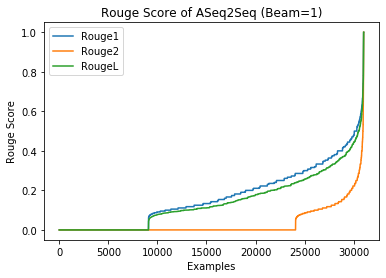

In [131]:
np_scores = np.array(as2s_b1_sampler.scores)

plt.plot(sorted(np_scores[:,1]), label='Rouge1')
plt.plot(sorted(np_scores[:,2]), label='Rouge2')
plt.plot(sorted(np_scores[:,3]), label='RougeL')

plt.xlabel('Examples')
plt.ylabel('Rouge Score')
plt.title('Rouge Score of ASeq2Seq (Beam=1)')

plt.legend()
plt.show()

### Pointer Network (Beam=1)

In [113]:
path = "../../models/pointer_generator_network_tensorflow/results/decode_test_150maxenc_1beam_5mindec_15maxdec_ckpt-138727/decoded"
hyp_pgn_b1_files = [join(path, f) for f in listdir(path) if isfile(join(path, f))]

In [114]:
hyp_pgn_b1_lines = []
for f in hyp_files:
    file = open(f, "r")
    line = file.readlines()[0]
    hyp_pgn_b1_lines.append(line)

In [115]:
PGN_b1_sampler = Sampler(hyp_pgn_b1_lines, ref_lines, source_lines)

In [202]:
PGN_b1_sampler.get_example(index=0, reverse=False)

Score:  0.0
Reference:   wpf : create your own screen - saver if your running application is ' idle '
Hypothesis:  how to make a [UNK] work ?

Answer: 
if your looking to create your own screensaver just create another form . remove the border from the form . make it the top most and start maximized . then you just paint the control to do whatever you want . then wire up the form to check if the mouse moves or a key is pressed . you 'll need to create a timer that will determine if the screensaver should be shown .




{'score': 0.0,
 'ref': "wpf : create your own screen - saver if your running application is ' idle '",
 'hyp': 'how to make a [UNK] work ?',
 'answer': "if your looking to create your own screensaver just create another form . remove the border from the form . make it the top most and start maximized . then you just paint the control to do whatever you want . then wire up the form to check if the mouse moves or a key is pressed . you 'll need to create a timer that will determine if the screensaver should be shown .\n"}

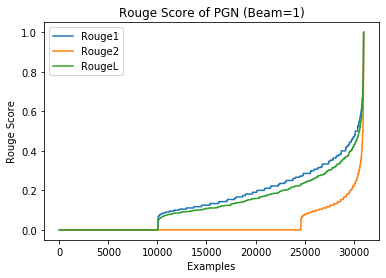

In [403]:
np_scores = np.array(PGN_b1_sampler.scores)

plt.plot(sorted(np_scores[:,1]), label='Rouge1')
plt.plot(sorted(np_scores[:,2]), label='Rouge2')
plt.plot(sorted(np_scores[:,3]), label='RougeL')

plt.xlabel('Examples')
plt.ylabel('Rouge Score')
plt.title('Rouge Score of PGN (Beam=1)')

plt.legend()
plt.show()

### Counting the UNK Token

In [409]:
A_B1_UNK_count = 0
P_B1_UNK_count = 0
A_B5_UNK_count = 0
P_B5_UNK_count = 0
A_B10_UNK_count = 0
P_B10_UNK_count = 0

for line in hyp_as2s_b1_lines:
    for token in line.split():
        if token == "UNK":
            A_B1_UNK_count += 1
            
for line in hyp_pgn_b1_lines:
    for token in line.split():
        if token == "[UNK]":
            P_B1_UNK_count += 1
            
for line in hyp_as2s_b5_lines:
    for token in line.split():
        if token == "UNK":
            A_B5_UNK_count += 1
            
for line in hyp_pgn_b5_lines:
    for token in line.split():
        if token == "[UNK]":
            P_B5_UNK_count += 1
            
for line in hyp_as2s_b10_lines:
    for token in line.split():
        if token == "UNK":
            A_B10_UNK_count += 1
            
for line in hyp_pgn_b10_lines:
    for token in line.split():
        if token == "[UNK]":
            P_B10_UNK_count += 1
            
print ("AS2S Beam=1 UNK Count: ", A_B1_UNK_count)
print ("PGN  Beam=1 UNK Count: ", P_B1_UNK_count)
print ("AS2S Beam=5 UNK Count: ", A_B5_UNK_count)
print ("PGN  Beam=5 UNK Count: ", P_B5_UNK_count)
print ("AS2S Beam=10 UNK Count: ", A_B10_UNK_count)
print ("PGN  Beam=10 UNK Count: ", P_B10_UNK_count)

AS2S Beam=1 UNK Count:  21871
PGN  Beam=1 UNK Count:  21762
AS2S Beam=5 UNK Count:  18516
PGN  Beam=5 UNK Count:  12275
AS2S Beam=10 UNK Count:  16672
PGN  Beam=10 UNK Count:  11609


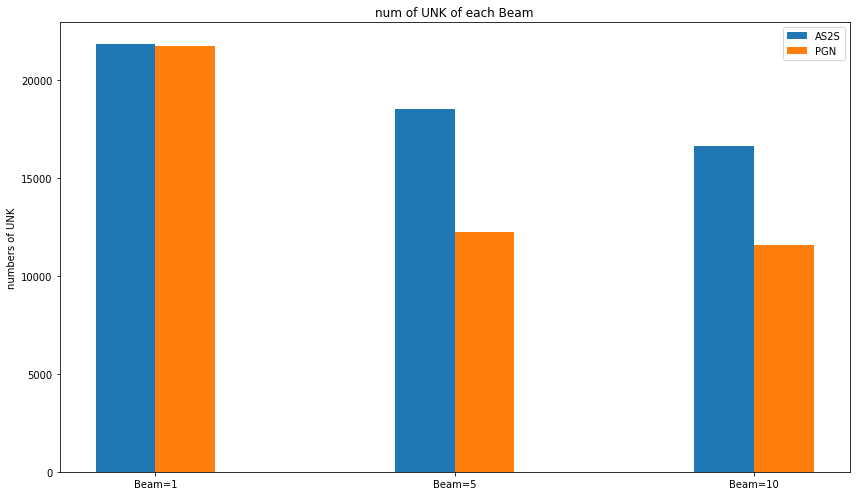

In [415]:
AS2S = (A_B1_UNK_count, A_B5_UNK_count, A_B10_UNK_count)
PGN = (P_B1_UNK_count, P_B5_UNK_count, P_B10_UNK_count)

ind = np.arange(3)  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(ind - width/2, AS2S, width, label='AS2S')
rects3 = ax.bar(ind + width/2, PGN, width, label='PGN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('numbers of UNK')
ax.set_title('num of UNK of each Beam')
ax.set_xticks(ind)
ax.set_xticklabels(('Beam=1', 'Beam=5', 'Beam=10'))
ax.legend()

fig.tight_layout()
plt.show()

### Comparing AS2S and PGN (Beam=1)

#### Rouge-Score Comparison

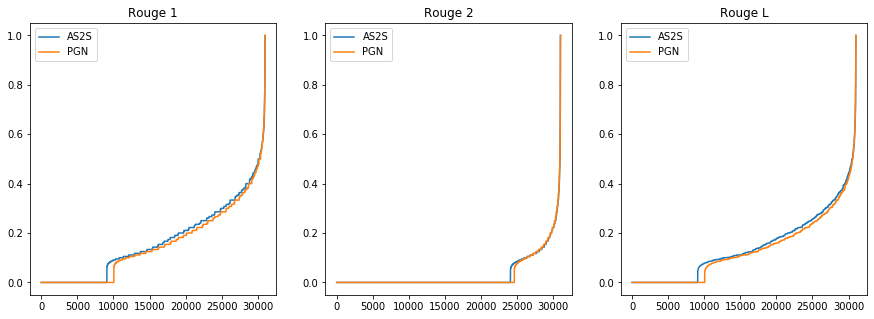

In [221]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,5))

A_scores = np.array(as2s_b1_sampler.scores)
P_scores = np.array(PGN_b1_sampler.scores)

ax1.plot(sorted(A_scores[:,1]), label='AS2S')
ax1.plot(sorted(P_scores[:,1]), label='PGN')
ax1.set_title("Rouge 1")
ax1.legend()

ax2.plot(sorted(A_scores[:,2]), label='AS2S')
ax2.plot(sorted(P_scores[:,2]), label='PGN')
ax2.set_title("Rouge 2")
ax2.legend()

ax3.plot(sorted(A_scores[:,3]), label='AS2S')
ax3.plot(sorted(P_scores[:,3]), label='PGN')
ax3.set_title("Rouge L")
ax3.legend()


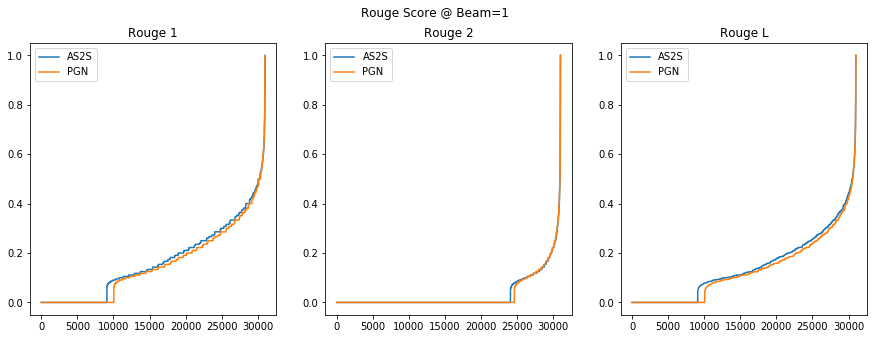

In [335]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,5))

A_scores = np.array(as2s_b1_sampler.scores)
P_scores = np.array(PGN_b1_sampler.scores)

ax1.plot(sorted(A_scores[:,1]), label='AS2S')
ax1.plot(sorted(P_scores[:,1]), label='PGN')
ax1.set_title("Rouge 1")
ax1.legend()

ax2.plot(sorted(A_scores[:,2]), label='AS2S')
ax2.plot(sorted(P_scores[:,2]), label='PGN')
ax2.set_title("Rouge 2")
ax2.legend()

ax3.plot(sorted(A_scores[:,3]), label='AS2S')
ax3.plot(sorted(P_scores[:,3]), label='PGN')
ax3.set_title("Rouge L")
ax3.legend()

fig.suptitle('Rouge Score @ Beam=1')
plt.show()


#### Qualitative Analysis

In [229]:
idx=0
P_sample = PGN_b1_sampler.get_example(index=idx, reverse=False, log=False)
A_sample = as2s_b1_sampler.get_example(index=idx, reverse=False, log=False)

print ("REF             :  \t{}".format(P_sample['ref'].strip()))
print ("AS2S [RL: {:.2f}]: \t{}".format(A_sample['score']*100, A_sample['hyp'].strip()))
print ("PGN  [RL: {:.2f}]: \t{}".format(P_sample['score']*100, P_sample['hyp'].strip()))
print ("\nAnswer: \n{}".format(P_sample['answer']))

REF             :  	wpf : create your own screen - saver if your running application is ' idle '
AS2S [RL: 0.00]: 	how to make a UNK mouse control ?
PGN  [RL: 0.00]: 	how to make a [UNK] work ?

Answer: 
if your looking to create your own screensaver just create another form . remove the border from the form . make it the top most and start maximized . then you just paint the control to do whatever you want . then wire up the form to check if the mouse moves or a key is pressed . you 'll need to create a timer that will determine if the screensaver should be shown .



### Comparison on all models

In [278]:
ref_file = open("../../data/clean/stackoverflow.com/test/targets.txt", "r")
source_file = open("../../data/clean/stackoverflow.com/test/sources.txt", "r")

hyp_as2s_b1_file = open("../../results/attention_seq2seq/pred_beam_01.txt", "r")
hyp_as2s_b5_file = open("../../results/attention_seq2seq/pred_beam_05.txt", "r")
hyp_as2s_b10_file = open("../../results/attention_seq2seq/pred_beam_10.txt", "r")

hyp_as2s_b1_lines = hyp_as2s_b1_file.readlines()
hyp_as2s_b5_lines = hyp_as2s_b5_file.readlines()
hyp_as2s_b10_lines = hyp_as2s_b10_file.readlines()

path_01 = "../../models/pointer_generator_network_tensorflow/results/decode_test_150maxenc_1beam_5mindec_15maxdec_ckpt-138727/decoded"
hyp_pgn_b1_files = [join(path_01, f) for f in listdir(path_01) if isfile(join(path_01, f))]
path_05 = "../../models/pointer_generator_network_tensorflow/results/decode_test_150maxenc_5beam_5mindec_15maxdec_ckpt-138727/decoded"
hyp_pgn_b5_files = [join(path_05, f) for f in listdir(path_05) if isfile(join(path_05, f))]
path_10 = "../../models/pointer_generator_network_tensorflow/results/decode_test_150maxenc_10beam_5mindec_15maxdec_ckpt-138727/decoded"
hyp_pgn_b10_files = [join(path_10, f) for f in listdir(path_10) if isfile(join(path_10, f))]

hyp_pgn_b1_lines = []
for f in hyp_pgn_b1_files:
    file = open(f, "r")
    line = file.readlines()[0]
    hyp_pgn_b1_lines.append(line)
    
hyp_pgn_b5_lines = []
for f in hyp_pgn_b5_files:
    file = open(f, "r")
    line = file.readlines()[0]
    hyp_pgn_b5_lines.append(line)
    
hyp_pgn_b10_lines = []
for f in hyp_pgn_b10_files:
    file = open(f, "r")
    line = file.readlines()[0]
    hyp_pgn_b10_lines.append(line)

In [279]:
as2s_b1_sampler = Sampler(hyp_as2s_b1_lines, ref_lines, source_lines)
as2s_b5_sampler = Sampler(hyp_as2s_b5_lines, ref_lines, source_lines)
as2s_b10_sampler = Sampler(hyp_as2s_b10_lines, ref_lines, source_lines)

PGN_b1_sampler = Sampler(hyp_pgn_b1_lines, ref_lines, source_lines)
PGN_b5_sampler = Sampler(hyp_pgn_b5_lines, ref_lines, source_lines)
PGN_b10_sampler = Sampler(hyp_pgn_b10_lines, ref_lines, source_lines)

In [280]:
PGN_b1_sampler.get_example(index=5000)
PGN_b5_sampler.get_example(index=5000)
PGN_b10_sampler.get_example(index=5000)

Score:  0.0
Reference:   collapse empty gtk.cellrenderer
Hypothesis:  how to show icons in a [UNK]

Answer: 
the solution is to write your own cellrenderer which accepts lists of icons . look at the implementation of such a renderer of getting things gnome ! todo app : http://bazaar.launchpad.net/~gtg/gtg/trunk/view/head:/gtg/gtk/browser/cellrenderertags.py then you set attribute with a list of objects to display . ( in the app you can show a solid color or an icon ) the result looks like this ( list of icons is the first column ) :


Score:  0.0
Reference:   convert some js to c #
Hypothesis:  what is the difference between ` let ` and ` var ` in swift

Answer: 
the line is a shortcut for achieving this : which might make more sense to you . see this answer for comparison between the almost equivalent in c # and in js


Score:  0.0
Reference:   no error message is displayed , the server only returned a " 500 internal server error "
Hypothesis:  [UNK] ( ) not working

Answer: 
try to c

{'score': 0.0,
 'ref': 'no error message is displayed , the server only returned a " 500 internal server error "',
 'hyp': '[UNK] ( ) not working',
 'answer': 'try to call instead of , so in your web browser enter the instead of .\n'}

### Understand Type of Questions

In [244]:
# WH-Question

wh_list = [
    'what', 
    'who', 
    'which', 
    'whom', 
    'where', 
    'when', 
    'whose', 
    'why', 
    'how'
]

# Do, Be, Has
yes_no_list = [
    'do',
    'does',
    'did',
    'have',
    'has',
    'had',
    'is',
    'are',
    'was',
    'were'
]

def count_question_types(lines):
    
    ''' Count each type of questions '''
    
    question_dict = {
        'what': 0,
        'who': 0,
        'which': 0,
        'whom': 0,
        'where': 0,
        'when': 0,
        'whose': 0,
        'why': 0,
        'how': 0,
        'yes-no': 0,
        'other': 0
    }
    
    for line in lines:
        token = line.split()[0]

        if token in wh_list: 
            question_dict[token] += 1
        elif token in yes_no_list:
            question_dict['yes-no'] += 1
        else:
            question_dict['other'] += 1
            
    return question_dict

In [281]:
ref_qcount = count_question_types(ref_lines)
as2s_b1_qcount = count_question_types(hyp_as2s_b1_lines)
as2s_b5_qcount = count_question_types(hyp_as2s_b5_lines)
as2s_b10_qcount = count_question_types(hyp_as2s_b10_lines)
pgn_b1_qcount = count_question_types(hyp_pgn_b1_lines)
pgn_b5_qcount = count_question_types(hyp_pgn_b5_lines)
pgn_b10_qcount = count_question_types(hyp_pgn_b10_lines)

In [248]:
ref_question_count

{'what': 978,
 'who': 4,
 'which': 122,
 'whom': 0,
 'where': 69,
 'when': 69,
 'whose': 0,
 'why': 565,
 'how': 5117,
 'yes-no': 879,
 'other': 23212}

Text(0.5, 1.0, 'Question Type (Reference)')

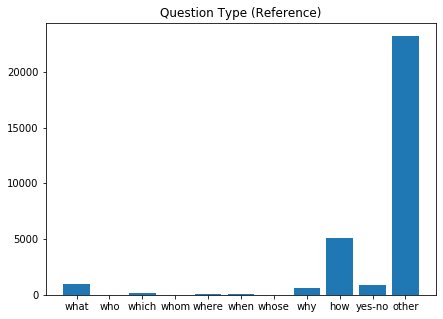

In [345]:
plt.figure(figsize=(7,5))
plt.bar(ref_question_count.keys(), ref_question_count.values())
plt.title('Question Type (Reference)')

In [ ]:
as2s_b1_qcount = count_question_types(hyp_as2s_b1_lines)

Text(0.5, 1.0, 'Question Type (AS2S Beam=1)')

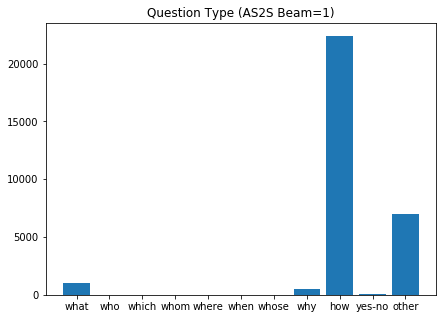

In [347]:
plt.figure(figsize=(7,5))
plt.bar(as2s_b1_qcount.keys(), as2s_b1_qcount.values())
plt.title('Question Type (AS2S Beam=1)')

<BarContainer object of 11 artists>

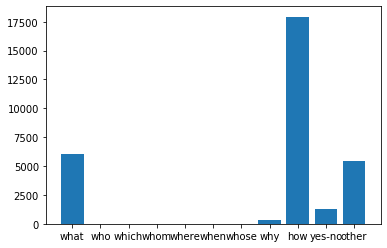

In [260]:
plt.bar(as2s_b5_qcount.keys(), as2s_b5_qcount.values())

<BarContainer object of 11 artists>

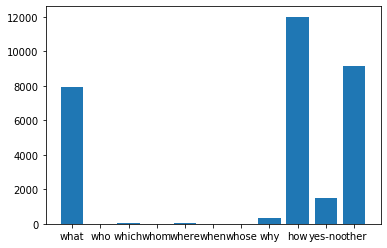

In [263]:
plt.bar(as2s_b10_qcount.keys(), as2s_b10_qcount.values())

Text(0.5, 1.0, 'Question Type (PGN Beam=1)')

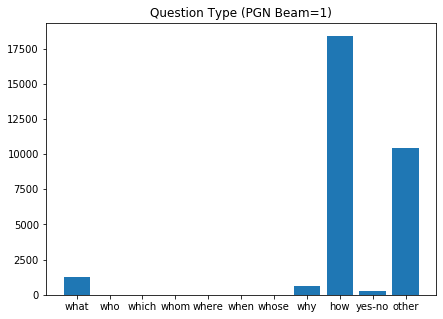

In [348]:
plt.figure(figsize=(7,5))
plt.bar(pgn_b1_qcount.keys(), pgn_b1_qcount.values())
plt.title('Question Type (PGN Beam=1)')

<BarContainer object of 11 artists>

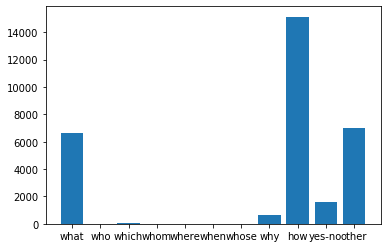

In [284]:
plt.bar(pgn_b5_qcount.keys(), pgn_b5_qcount.values())

<BarContainer object of 11 artists>

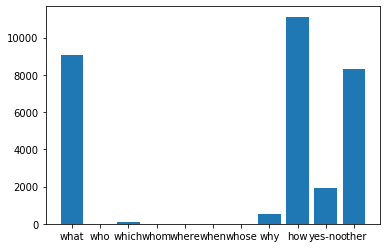

In [360]:
plt.bar(pgn_b10_qcount.keys(), pgn_b10_qcount.values())

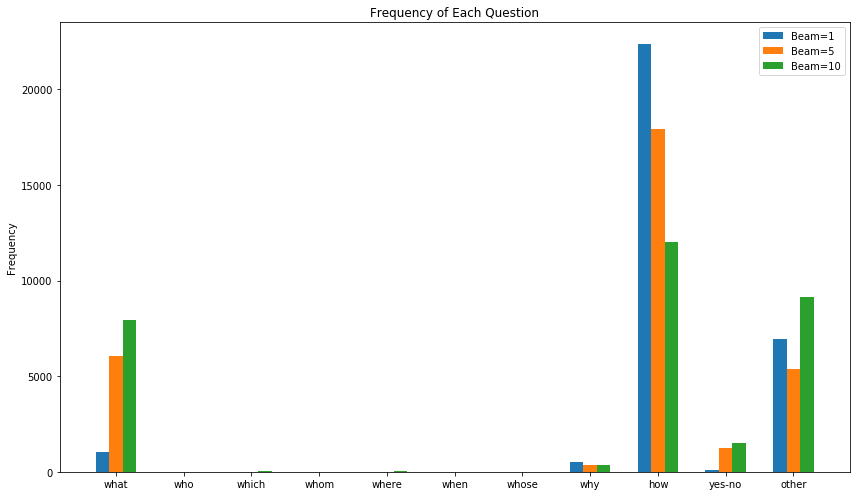

In [380]:
b1 = as2s_b1_qcount.values()
b5 = as2s_b5_qcount.values()
b10 = as2s_b10_qcount.values()

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(ind - width, b1, width, label='Beam=1')
rects2 = ax.bar(ind , b5, width, label='Beam=5')
rects3 = ax.bar(ind + width, b10, width, label='Beam=10')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Each Question')
ax.set_xticks(ind)
ax.set_xticklabels(as2s_b1_qcount.keys())
ax.legend()

fig.tight_layout()
plt.show()

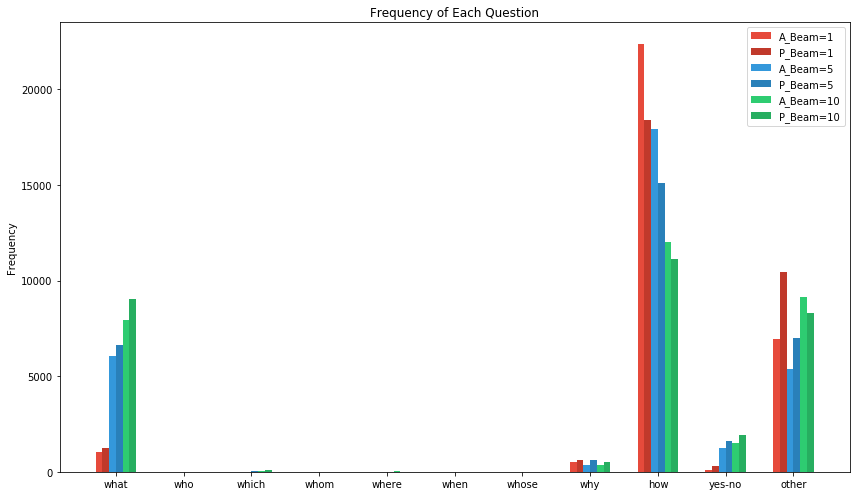

In [402]:
A_b1 = as2s_b1_qcount.values()
A_b5 = as2s_b5_qcount.values()
A_b10 = as2s_b10_qcount.values()
P_b1 = pgn_b1_qcount.values()
P_b5 = pgn_b5_qcount.values()
P_b10 = pgn_b10_qcount.values()

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(ind + - 2*width + (-1 * width/2),   A_b1, width, label='A_Beam=1', color=(0.9, 0.29, 0.23))
rects1 = ax.bar(ind + - width + (-1 * width/2),   P_b1, width, label='P_Beam=1', color=(192/255.0, 57/255.0, 43/255.0))
rects1 = ax.bar(ind + (-1 * width/2),   A_b5, width, label='A_Beam=5', color=(52/255.0, 152/255.0, 219/255.0))
rects2 = ax.bar(ind + (  width/2),   P_b5, width, label='P_Beam=5', color=(41/255.0, 128/255.0, 185/255.0))
rects2 = ax.bar(ind + ( 1*width + width/2),   A_b10, width, label='A_Beam=10', color=(46/255.0, 204/255.0, 113/255.0))
rects2 = ax.bar(ind + ( 2*width + width/2),   P_b10, width, label='P_Beam=10', color=(39/255.0, 174/255.0, 96/255.0))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Each Question')
ax.set_xticks(ind)
ax.set_xticklabels(as2s_b1_qcount.keys())
ax.legend()

fig.tight_layout()
plt.show()

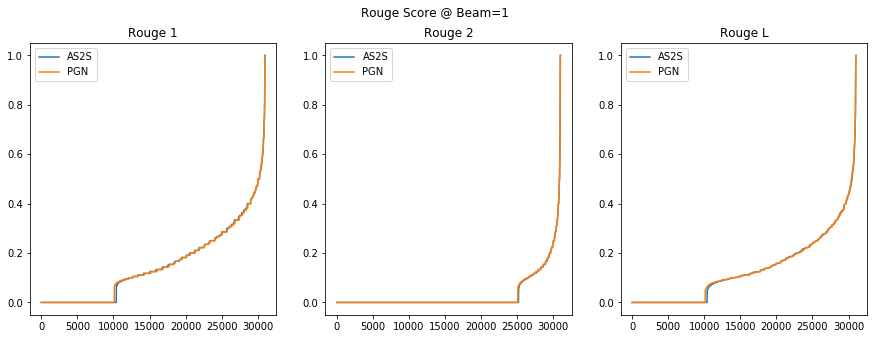

In [416]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,5))

A_scores = np.array(as2s_b5_sampler.scores)
P_scores = np.array(PGN_b5_sampler.scores)

ax1.plot(sorted(A_scores[:,1]), label='AS2S')
ax1.plot(sorted(P_scores[:,1]), label='PGN')
ax1.set_title("Rouge 1")
ax1.legend()

ax2.plot(sorted(A_scores[:,2]), label='AS2S')
ax2.plot(sorted(P_scores[:,2]), label='PGN')
ax2.set_title("Rouge 2")
ax2.legend()

ax3.plot(sorted(A_scores[:,3]), label='AS2S')
ax3.plot(sorted(P_scores[:,3]), label='PGN')
ax3.set_title("Rouge L")
ax3.legend()

fig.suptitle('Rouge Score @ Beam=1')
plt.show()


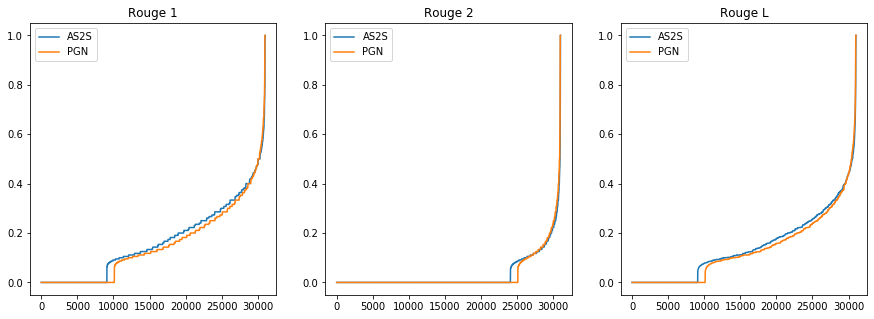

In [417]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,5))

A_scores = np.array(as2s_b1_sampler.scores)
P_scores = np.array(PGN_b5_sampler.scores)

ax1.plot(sorted(A_scores[:,1]), label='AS2S')
ax1.plot(sorted(P_scores[:,1]), label='PGN')
ax1.set_title("Rouge 1")
ax1.legend()

ax2.plot(sorted(A_scores[:,2]), label='AS2S')
ax2.plot(sorted(P_scores[:,2]), label='PGN')
ax2.set_title("Rouge 2")
ax2.legend()

ax3.plot(sorted(A_scores[:,3]), label='AS2S')
ax3.plot(sorted(P_scores[:,3]), label='PGN')
ax3.set_title("Rouge L")
ax3.legend()


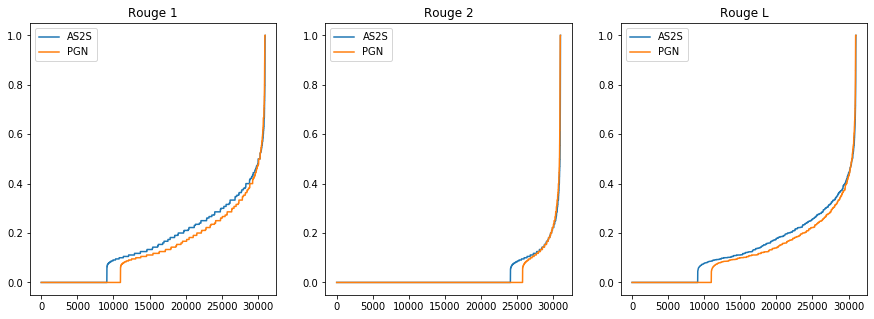

In [418]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,5))

A_scores = np.array(as2s_b10_sampler.scores)
P_scores = np.array(PGN_b10_sampler.scores)

ax1.plot(sorted(A_scores[:,1]), label='AS2S')
ax1.plot(sorted(P_scores[:,1]), label='PGN')
ax1.set_title("Rouge 1")
ax1.legend()

ax2.plot(sorted(A_scores[:,2]), label='AS2S')
ax2.plot(sorted(P_scores[:,2]), label='PGN')
ax2.set_title("Rouge 2")
ax2.legend()

ax3.plot(sorted(A_scores[:,3]), label='AS2S')
ax3.plot(sorted(P_scores[:,3]), label='PGN')
ax3.set_title("Rouge L")
ax3.legend()


In [355]:
indices = []
normal_indices = []
scores = as2s_b1_sampler.scores
for score in scores:
    if score[3] == 0:
        indices.append(score[0])
    else:
        normal_indices.append(score[0])

as2s_b1_zero_score_lines = []
for index in indices:
    as2s_b1_zero_score_lines.append(hyp_as2s_b1_lines[index])
    
as2s_b1_normal_score_lines = []
for index in normal_indices:
    as2s_b1_normal_score_lines.append(hyp_as2s_b1_lines[index])
    
pgn_b1_zero_score_lines = []
for index in indices:
    pgn_b1_zero_score_lines.append(hyp_pgn_b1_lines[index])

pgn_b1_normal_score_lines = []
for index in normal_indices:
    pgn_b1_normal_score_lines.append(hyp_pgn_b1_lines[index])
    
as2s_b1_zero_score_qcount = count_question_types(as2s_b1_zero_score_lines)
as2s_b1_normal_score_qcount = count_question_types(as2s_b1_normal_score_lines)
pgn_b1_zero_score_qcount = count_question_types(pgn_b1_zero_score_lines)
pgn_b1_normal_score_qcount = count_question_types(pgn_b1_normal_score_lines)

Text(0.5, 1.0, 'Question Type (AS2S Beam=1 RougeL=0)')

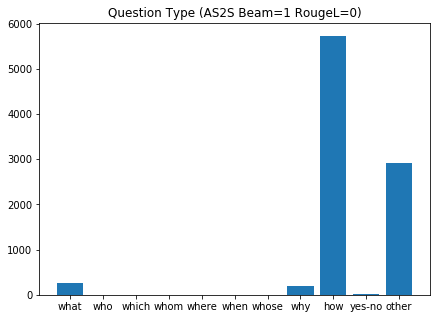

In [353]:
plt.figure(figsize=(7,5))
plt.bar(as2s_b1_zero_score_qcount.keys(), as2s_b1_zero_score_qcount.values())
plt.title('Question Type (AS2S Beam=1 RougeL=0)')

Text(0.5, 1.0, 'Question Type (AS2S Beam=1 RougeL>0)')

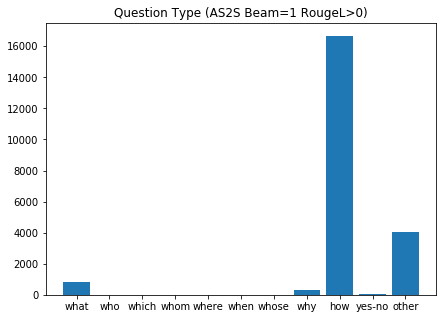

In [356]:
plt.figure(figsize=(7,5))
plt.bar(as2s_b1_normal_score_qcount.keys(), as2s_b1_normal_score_qcount.values())
plt.title('Question Type (AS2S Beam=1 RougeL>0)')

Text(0.5, 1.0, 'Question Type (PGN Beam=1 RougeL=0)')

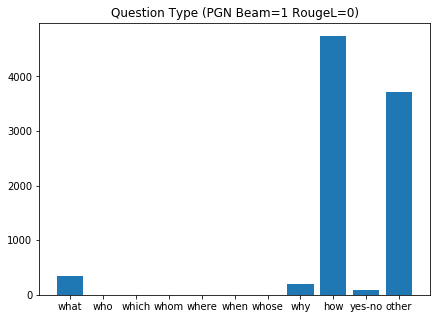

In [358]:
plt.figure(figsize=(7,5))
plt.bar(pgn_b1_zero_score_qcount.keys(), pgn_b1_zero_score_qcount.values())
plt.title('Question Type (PGN Beam=1 RougeL=0)')

Text(0.5, 1.0, 'Question Type (PGN Beam=1 RougeL>0)')

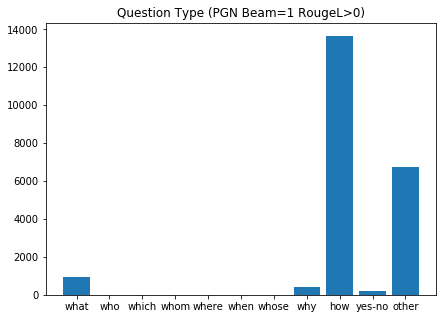

In [359]:
plt.figure(figsize=(7,5))
plt.bar(pgn_b1_normal_score_qcount.keys(), pgn_b1_normal_score_qcount.values())
plt.title('Question Type (PGN Beam=1 RougeL>0)')

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(pgn_b1_zero_score_qcount.keys(), pgn_b1_zero_score_qcount.values())
plt.title('Question Type (PGN Beam=1 RougeL=0)')

Text(0.5, 1.0, 'Token Length (AS2S Beam=1 RougeL=0)')

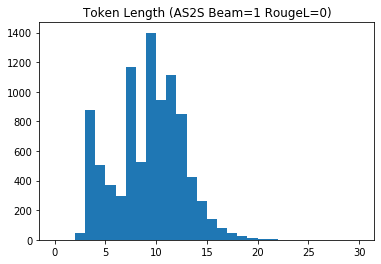

In [337]:
# as2s_b1_zero_score_lines
token_length = []
for line in as2s_b1_zero_score_lines:
    token_length.append(len(line.split()))
plt.hist(token_length, bins=30, range=(0, 30))
plt.title("Token Length (AS2S Beam=1 RougeL=0)")

Text(0.5, 1.0, 'Token Length (AS2S Beam=1 RougeL=All)')

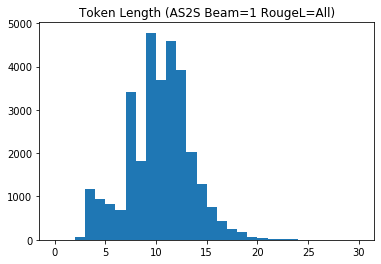

In [339]:
# as2s_b1_lines
token_length = []
for line in hyp_as2s_b1_lines:
    token_length.append(len(line.split()))
plt.hist(token_length, bins=30, range=(0, 30))
plt.title("Token Length (AS2S Beam=1 RougeL=All)")

Text(0.5, 1.0, 'Token Length (Reference)')

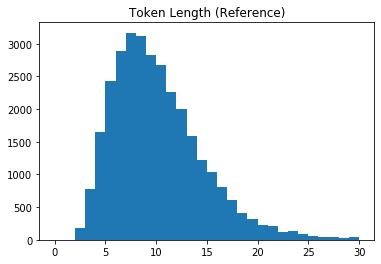

In [338]:
# reference
token_length = []
for line in ref_lines:
    token_length.append(len(line.split()))
plt.hist(token_length, bins=30, range=(0,30))
plt.title("Token Length (Reference)")

Text(0.5, 1.0, 'Token Length (AS2S Beam=1 RougeL>0)')

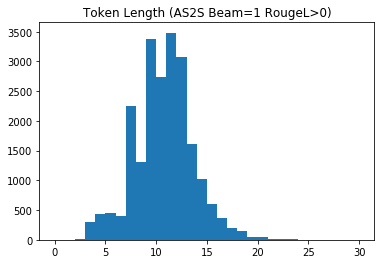

In [341]:
# normal score
token_length = []
for line in as2s_b1_normal_score_lines:
    token_length.append(len(line.split()))
plt.hist(token_length, bins=30, range=(0,30))
plt.title("Token Length (AS2S Beam=1 RougeL>0)")


In [ ]:
import spacy

In [52]:
text = "SEQ2SEQ model specifically trained on general data has \
high perplexity on grounded data.6 We observe that the perplexity of MTASK and MTASK-R models on both general \
and grounded data is as low as the SEQ2SEQ models that \
are trained specifically on general and grounded data respectively. As expected, injecting more factual content into the \
response in MTASK-F and MTASK-RF increased the perplexity especially on grounded data."

In [232]:
text

'SEQ2SEQ model specifically trained on general data has high perplexity on grounded data.6 We observe that the perplexity of MTASK and MTASK-R models on both general and grounded data is as low as the SEQ2SEQ models that are trained specifically on general and grounded data respectively. As expected, injecting more factual content into the response in MTASK-F and MTASK-RF increased the perplexity especially on grounded data.'

In [36]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
tokenizer = Tokenizer(nlp.vocab)

In [53]:
tokenize_text = [token.text for token in tokenizer(text)]

In [54]:
" ".join(tokenize_text)

'SEQ2SEQ model specifically trained on general data has high perplexity on grounded data.6 We observe that the perplexity of MTASK and MTASK-R models on both general and grounded data is as low as the SEQ2SEQ models that are trained specifically on general and grounded data respectively. As expected, injecting more factual content into the response in MTASK-F and MTASK-RF increased the perplexity especially on grounded data.'